<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Iris_FlowerPrediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#Load our Dataset
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load the model
path = "/content/drive/MyDrive/datasets/Iris.csv"
iris = pd.read_csv(path)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.shape

(150, 6)

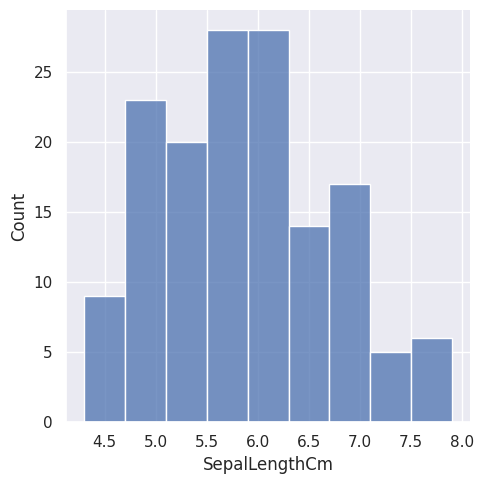

In [ ]:
#Data Analysis
sns.set()
sns.displot(iris["SepalLengthCm"])

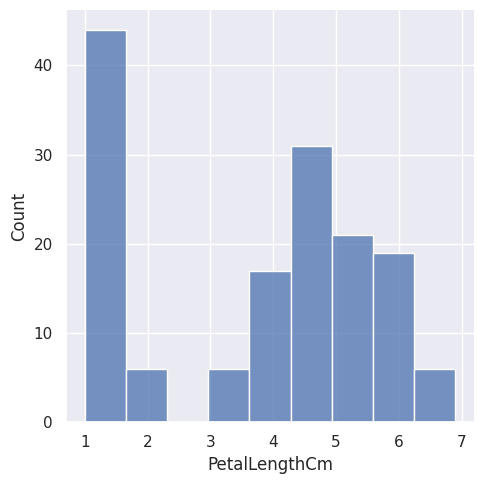

In [ ]:
sns.displot(iris["PetalLengthCm"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris["Species"] = le.fit_transform(iris["Species"])

In [ ]:
#Drop Columns and Split
X = iris.drop(["Species", "Id"], axis=1)
Y = iris["Species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=20
)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Print accuracy
    pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    #score = cross_val_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print(accuracy)
    #print(score)
    print(matrix)

    sns.heatmap(matrix, annot=True)

0.9565217391304348
[[6 0 0]
 [0 8 0]
 [0 1 8]]


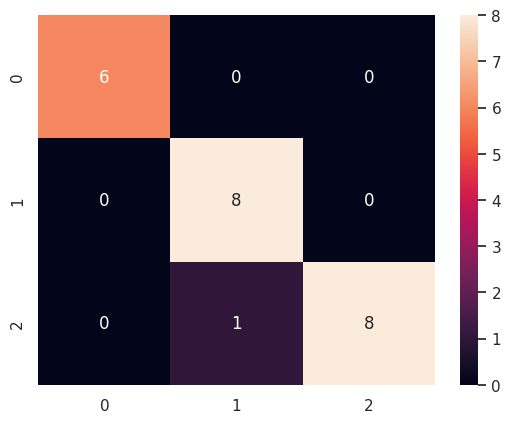

In [ ]:
#LogisticRegression
logreg = LogisticRegression()
model_function(logreg)

0.9565217391304348
[[6 0 0]
 [0 8 0]
 [0 1 8]]


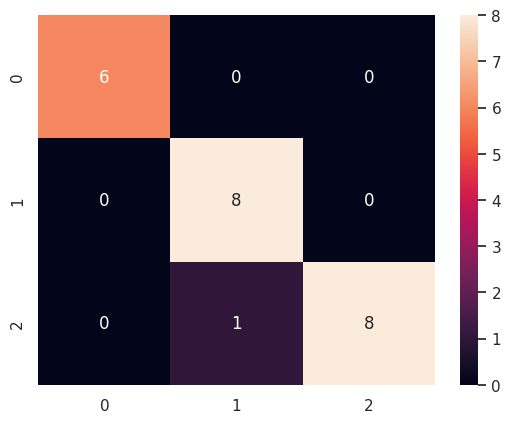

In [ ]:
#Trees
trees = ExtraTreesClassifier()
model_function(trees)